In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import csv
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"

    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"

    def run(self, images):
        pass


class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"

    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array(
    [MyPreProcess(), MyProcess(), MyPostProcess(), MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)

Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


### 6/01/20 : count number of elements in images

In [5]:
path = "C:/Users/ng85ffc/Desktop/"
path1 = "Data/"

In [6]:
fname = path + path1 + "SEATGURU_INFO_AIRCRAFT.csv"
ifile = open(fname, "rt")

airline_name = []
aircraft_type = []
category = []
flight_type = []
count = []
total_seat = []
seat_class = []
seat_type = []
seat_position = []

try:
    reader = csv.reader(ifile, delimiter=";")
    for row in reader:
        airline_name.append(row[1])
        aircraft_type.append(row[2])
        category.append(row[3])
        flight_type.append(row[4])
        count.append(row[5])
        total_seat.append(row[6])
        seat_class.append(row[7])
        seat_type.append(row[8])
        seat_position.append(row[9])
finally:
    ifile.close()

In [7]:
len(airline_name)

10331

In [8]:
my_list = list(set(aircraft_type[2001:3000]))

In [9]:
fname = path + path1 + "Correspondances_images.csv"
file = open(fname, 'wt', newline='')


try:
    writer = csv.writer(file, delimiter=";")
    # header writing
    writer.writerow(('Airline_Name', 'Aircraft_Type', 'Images'))

    for j in my_list:
        index = []
        for i in range(2001, 3000):
            if j == aircraft_type[i]:
                index.append(i)
        a = (str(min(index)+1) + "-" + str(max(index)+1))
        # line writing
        writer.writerow((j, index))

finally:
    file.close()

In [10]:
for j in my_list:
    index = []
    for i in range(1, len(aircraft_type)):
        if j == aircraft_type[i]:
            index.append(i)
    print(j, str(min(index)) + '-' + str(max(index)))

Boeing 767-300 1753-8099
Boeing 787-8 225-10323
Airbus A321-200 V3 2200-9880
Boeing 787-800 C 2090-2102
Airbus A330-200 130-9888
Airlines Airbus A320 1484-10150
Boeing 777-200 ER D 2289-2300
Airways Boeing 777-300ER A 2999-3020
Airlines Q400 2372-7173
Airways A330 E new 2981-2991
ATR 72-500 324-10068
Boeing 747-400 full 2249-2263
Airlines Embraer 190 2580-8725
Boeing 787-900 469-8062
Airlines Embraer195 2367-2371
Airbus A320 236-10134
Airlines Airbus A330-200 2567-8799
A320-200 C 2524-2529
Embraer 190 A 2884-2888
Boeing 777-200 3 2821-2832
Airbus A380 2149-7446
Embraer 190 521-6740
Bombardier Q200 C 2553-2556
Airways Boeing 777-200 B 2992-2998
A340-542 2454-2461
Airbus A319 360-9176
Airlines Airbus A320neo 2561-7844
Airbus A320-200 C 2642-2647
Airlines ATR 72-600 2576-2579
Airbus A318-100 2379-2388
Airbus A330 200 2917-10065
Airbus A320-200 6-7082
Bombardier Q200 A 2545-2548
Boeing 747-400 D 2757-6144
A319-111 2491-2498
Airbus A330 33P 2948-2955
Airbus A321 C 379-2672
Airbus A380 new 2

### 7/01/20 : template machine on exit

In [11]:
path = "C:/Users/ng85ffc/Desktop/"
path1 = "Data/"
path2 = "ProjetInterpromo2020g8/images/"
path3 = "LAYOUT SEATGURU"

#### Separation of plans according to their type

In [12]:
files = [f for f in listdir(path+path1+path3)
         if isfile(join(path+path1+path3, f))]

In [13]:
type1_file = []
type2_file = []

for i in files:
    if i[len(i)-3:len(i)] == "jpg":
        type1_file.append(i)
    else:
        type2_file.append(i)

##### First type of image with SeatGuru, ex: Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg

In [14]:
#img_rgb = cv2.imread(path + path1 + path3 + "/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg")
img_rgb = cv2.imread(path + path1 + path3 +
                     "/Aeroflot_Russian_Airlines_Sukhoi_Superjet_100-95B_plane13.jpg")
#img_rgb = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2HSV)
#greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))

In [15]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template1 = cv2.imread(path + path2 + 'Exit17.png',0)
template2 = cv2.imread(path + path2 + 'Exit16.png',0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

In [16]:
#cv2.imshow('plan', img_gray)
#cv2.imshow('template', template)

In [17]:
template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

In [135]:
THRESHOLD: float = 0.9
coordinate_exit = []
for i in range(2):
    res = cv2.matchTemplate(img_gray, template[i], cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w[i],
                                    pt[1] + h[i]), (0, 0, 255), 2)
        coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

    plt.plot, plt.imshow(img_rgb, cmap='gray')
    # plt.figure()
    cv2.imwrite('res' + str(i) + '.png', img_rgb)

In [136]:
coordinate_exit

[(126, 295),
 (114, 518),
 (129, 1085),
 (303, 296),
 (304, 296),
 (303, 297),
 (304, 297),
 (303, 1086),
 (302, 1087),
 (303, 1087)]

In [137]:
def find_duplicate(coordinate: list):
    dup = []
    for coord in coordinate:
        for i in coordinate:
            for j in range(5):
                if (coord[0] == i[0]+j or coord[0] == i[0]-j or coord[0] == i[0]) and (coord[1] == i[1]+j or coord[1] == i[1]-j or coord[1] == i[1]) and (coord != i):
                    dup.append(i)
    return(dup)

In [138]:
find_duplicate(coordinate_exit)

[(304, 296),
 (303, 297),
 (304, 297),
 (303, 296),
 (303, 297),
 (304, 297),
 (303, 296),
 (304, 296),
 (304, 297),
 (303, 296),
 (304, 296),
 (303, 297),
 (302, 1087),
 (303, 1087),
 (303, 1086),
 (303, 1087),
 (303, 1086),
 (302, 1087)]

In [139]:
def remove_duplicate(dup: list):
    while dup:
        del coordinate_exit[coordinate_exit.index(dup[0])]
        dup = find_duplicate(coordinate_exit)
    return(coordinate_exit)

In [140]:
remove_duplicate(find_duplicate(coordinate_exit))

[(126, 295), (114, 518), (129, 1085), (303, 296), (303, 1086)]

In [134]:
remove_duplicate(find_duplicate(b))

[(126, 295),
 (114, 518),
 (129, 1085),
 (303, 296),
 (304, 296),
 (303, 1086),
 (303, 1087)]

In [96]:
dup=find_duplicate(coordinate_exit)

In [97]:
dup

[]

In [77]:
dupli = []

In [64]:
a = coordinate_exit[0]
coord_wo_dup = [a]
    for i in range(len(coord_wo_dup)):
        for j in range(5):
            if (a[0] != coord_wo_dup[i][0]+j or a[0] != coord_wo_dup[i][0]-j) and (a[1] != coord_wo_dup[i][1]+j or a[1] != coord_wo_dup[i][1]-j) and (a not in coord_wo_dup):
                    coord_wo_dup.append(coord)
                    #print(str(m) + " : " + str(i))

IndentationError: unexpected indent (<ipython-input-64-ec1974c4f162>, line 3)

In [62]:
coord_wo_dup

[]

#### Display of all images in folder to check consistency

In [19]:
THRESHOLD: float = 0.9

template1 = cv2.imread(path + path2 + 'Exit17.png', 0)
template2 = cv2.imread(path + path2 + 'Exit16.png', 0)
w1, h1 = template1.shape[::-1]
w2, h2 = template2.shape[::-1]

template = [template1, template2]
w = [w1, w2]
h = [h1, h2]

coordinate = []
for img in type1_file:
    img_rgb = cv2.imread(path + path1 + path3 + "/" + img)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

    coordinate_exit = []
    for i in range(2):
        res = cv2.matchTemplate(img_gray, template[i], cv2.TM_CCOEFF_NORMED)
        loc = np.where(res >= THRESHOLD)
        for pt in zip(*loc[::-1]):
            cv2.rectangle(
                img_rgb, pt, (pt[0] + w[i], pt[1] + h[i]), (0, 0, 255), 2)
            coordinate_exit.append((pt[0] + w[i], pt[1] + h[i]))

        #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
        # plt.figure()
        cv2.imwrite(path + path1 + 'Type1/res' + str(img) + '.png', img_rgb)
    coordinate.append(coordinate_exit)

In [20]:
len(coordinate)

683

##### Second type of image with SeatGuru, ex: Qatar_Airways_Boeing_777-300ER_plane737.svg.png

In [21]:
img_rgb = cv2.imread(path + path1 + path3 +
                     "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread(path + path2 + 'Exit11.png', 0)
w, h = template.shape[::-1]

In [22]:
THRESHOLD: float = 0.7
coordinate_exit = []
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
loc = np.where(res >= THRESHOLD)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
    coordinate_exit.append((pt[0] + w, pt[1] + h))

plt.plot, plt.imshow(img_rgb, cmap='gray')
cv2.imwrite('res.png', img_rgb)

True

In [23]:
coordinate_exit

[(173, 190),
 (266, 190),
 (173, 191),
 (266, 191),
 (163, 471),
 (167, 471),
 (274, 471),
 (163, 884),
 (274, 884),
 (163, 1185),
 (167, 1185),
 (274, 1185),
 (274, 1492),
 (163, 1493),
 (274, 1493)]

#### Display of all images in folder to check consistency

In [24]:
THRESHOLD: float = 0.7
coordinate = []

for img in type2_file:
    img_rgb = cv2.imread(path + path1 + path3 +
                         "/Qatar_Airways_Boeing_777-300ER_plane737.svg.png")
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
    template = cv2.imread(path + path2 + 'Exit11.png', 0)
    w, h = template.shape[::-1]

    coordinate_exit = []
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    loc = np.where(res >= THRESHOLD)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)
        coordinate_exit.append((pt[0] + w, pt[1] + h))

    #plt.plot,plt.imshow(img_rgb,cmap = 'gray')
    cv2.imwrite(path + path1 + 'Type2/res' + str(img) + '.png', img_rgb)
    coordinate.append(coordinate_exit)

In [25]:
len(coordinate)

512

Soit deux templates : Exit12 0,7 & Exit15 0,8
// Soit un : Exit11 0,7

### 8/01/20-9/01/19 : Postprocesing

#### Align dots and remove duplicates

In [26]:
# align all coordinates of the pixels
def align(liste):
    # First two lines if the first list is a list of tuples
    #     liste_x = [i[0] for i in liste]
    #     liste_y = [i[1] for i in liste]
    # Separate x and y if we have a list of numbers like [x1, y1, x2, y2, ...]
    liste_x = [liste[i] for i in range(len(liste)) if i % 2 == 0]
    liste_y = [liste[i] for i in range(len(liste)) if i % 2 == 1]

    serie_x = pd.Series(liste_x).value_counts().sort_index()
    serie_y = pd.Series(liste_y).value_counts().sort_index()

    px_rare_x = list(serie_x.loc[serie_x <= 3].index)
    px_nb_x = list(serie_x.loc[serie_x > 3].index)

    px_rare_y = list(serie_y.loc[serie_y <= 3].index)
    px_nb_y = list(serie_y.loc[serie_y > 3].index)

    for i in range(len(liste_x)):
        if liste_x[i] in px_rare_x:
            liste_dist = list(abs(np.array(px_nb_x) - liste_x[i]))
            index = liste_dist.index(min(liste_dist))
            liste_x[i] = px_nb_x[index]
        if liste_y[i] in px_rare_y:
            liste_dist = list(abs(np.array(px_nb_y) - liste_y[i]))
            index = liste_dist.index(min(liste_dist))
            liste_y[i] = px_nb_y[index]

    liste_coord = zip(liste_x, liste_y)
    return list(liste_coord)

In [27]:
# Remove all the double detection of one object
def remove_double_detection(liste: list):
    serie = pd.Series(liste).value_counts()
    tuples = serie.loc[serie > 1].index
    for i in tuples:
        liste.remove(i)
    return liste

In [28]:
liste_coord = [146, 517,
               133, 537,
               146, 537,
               185, 537,
               198, 537,
               211, 537,
               224, 537,
               263, 537,
               276, 537,
               133, 557,
               146, 557,
               185, 557,
               198, 557,
               211, 557,
               224, 557,
               263, 557,
               276, 557,
               133, 577,
               146, 577,
               185, 577,
               198, 577,
               211, 577,
               224, 577,
               263, 577,
               276, 577,
               133, 597,
               146, 597,
               185, 597,
               198, 597,
               211, 597,
               224, 597,
               263, 597,
               276, 597,
               133, 617,
               146, 617,
               185, 617,
               198, 617,
               211, 617,
               224, 617,
               263, 617,
               276, 617,
               133, 637,
               146, 637,
               185, 637,
               198, 637,
               211, 637,
               224, 637,
               263, 637,
               276, 637,
               133, 657,
               146, 657,
               185, 657,
               198, 657,
               211, 657,
               224, 657,
               263, 657,
               276, 657,
               133, 677,
               146, 677,
               185, 677,
               198, 677,
               211, 677,
               224, 677,
               263, 677,
               276, 677,
               133, 697,
               146, 697,
               185, 697,
               198, 697,
               211, 697,
               224, 697,
               263, 697,
               276, 697,
               133, 717,
               146, 717,
               185, 717,
               198, 717,
               211, 717,
               224, 717,
               263, 717,
               276, 717,
               133, 737,
               146, 737,
               185, 737,
               198, 737,
               211, 737,
               224, 737,
               263, 737,
               276, 737,
               133, 757,
               146, 757,
               185, 757,
               198, 757,
               211, 757,
               224, 757,
               263, 757,
               276, 757,
               133, 777,
               146, 777,
               185, 777,
               198, 777,
               211, 777,
               224, 777,
               263, 777,
               276, 777,
               133, 797,
               146, 797,
               185, 797,
               198, 797,
               211, 797,
               224, 797,
               263, 797,
               276, 797,
               133, 817,
               146, 817,
               185, 817,
               198, 817,
               211, 817,
               224, 817,
               263, 817,
               276, 817,
               133, 837,
               146, 837,
               185, 837,
               198, 837,
               211, 837,
               224, 837,
               263, 837,
               276, 837,
               133, 857,
               146, 857,
               263, 857,
               276, 857,
               133, 971,
               146, 971,
               185, 971,
               198, 971,
               211, 971,
               224, 971,
               263, 971,
               276, 971,
               133, 991,
               146, 991,
               185, 991,
               198, 991,
               211, 991,
               224, 991,
               263, 991,
               276, 991,
               133, 1011,
               146, 1011,
               185, 1011,
               198, 1011,
               211, 1011,
               224, 1011,
               263, 1011,
               276, 1011,
               133, 1031,
               146, 1031,
               185, 1031,
               198, 1031,
               211, 1031,
               224, 1031,
               263, 1031,
               276, 1031,
               133, 1051,
               146, 1051,
               185, 1051,
               198, 1051,
               211, 1051,
               224, 1051,
               263, 1051,
               276, 1051,
               133, 1071,
               146, 1071,
               185, 1071,
               198, 1071,
               211, 1071,
               224, 1071,
               263, 1071,
               276, 1071,
               133, 1091,
               146, 1091,
               185, 1091,
               198, 1091,
               211, 1091,
               224, 1091,
               263, 1091,
               276, 1091,
               133, 1111,
               146, 1111,
               185, 1111,
               198, 1111,
               211, 1111,
               224, 1111,
               263, 1111,
               276, 1111,
               133, 1131,
               146, 1131,
               185, 1131,
               198, 1131,
               211, 1131,
               224, 1131,
               263, 1131,
               276, 1131,
               135, 1151,
               148, 1151,
               261, 1151,
               274, 1151,
               137, 1171,
               150, 1171,
               191, 1171,
               204, 1171,
               217, 1171,
               259, 1171,
               272, 1171,
               139, 1191,
               152, 1191,
               191, 1191,
               204, 1191,
               217, 1191]

In [29]:
l_test = align(liste_coord)
#l_test = remove_double_detection(l_test)

In [30]:
x = [a for a,b in l_test]
y = [b for a,b in l_test]

#### Other method

In [141]:
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.cluster import KMeans
import numpy as np

In [142]:
plan = open(path + path1 +
            "coord-Aer_Lingus_Airbus_A330-200_plane4-BusinessSeats.txt", "r")
data = plan.read()

In [143]:
list1 = []
list2 = []
data_array = data.replace('\n', ',').replace(' ', '').split(',')

for i in range(0, len(data_array)-1, 2):
    list1.append(int(data_array[i]))
    list2.append(int(data_array[i+1]))

In [144]:
data_array.remove('')

In [145]:
data_array = [int(i) for i in data_array]

In [146]:
liste = np.array(list(zip(list1,list2)))

In [154]:
liste = list(zip(list1,list2))

#### Duplicate

In [148]:
def find_duplicate(coordinate: list):
    dup = []
    for coord in coordinate:
        for i in coordinate:
            for j in range(5):
                if (coord[0] == i[0]+j or coord[0] == i[0]-j or coord[0] == i[0]) and (coord[1] == i[1]+j or coord[1] == i[1]-j or coord[1] == i[1]) and (coord != i):
                    dup.append(i)
    return(dup)

In [157]:
def remove_duplicate(dup: list, liste_with_dup:list):
    while dup:
        del liste_with_dup[liste_with_dup.index(dup[0])]
        dup = find_duplicate(liste_with_dup)
    return(liste_with_dup)

In [162]:
liste = remove_duplicate(find_duplicate(liste), liste)

In [163]:
x = [a for a,b in liste]
y = [b for a,b in liste]

#### Kmeans

In [37]:
random_grid = {'max_iter': [100, 150, 200, 250, 300, 350, 400],
               'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'init': ['k-means++', 'random'],
               'precompute_distances': ['auto', True, False],
               'algorithm': ['auto', 'full', 'elkan']}

In [38]:
km = KMeans()

In [39]:
km_random = RandomizedSearchCV(
    estimator=km, param_distributions=random_grid, n_iter=10, verbose=2, random_state=42, n_jobs=-1)
km_random.fit(l_test)
print(km_random.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.6s finished


{'precompute_distances': False, 'n_clusters': 14, 'max_iter': 350, 'init': 'random', 'algorithm': 'full'}


In [40]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(precompute_distances=False, n_clusters=6,
                max_iter=350, init='random', algorithm='full').fit(l_test)
kmeans.labels_

kmeans.cluster_centers_

array([[  198.66666667,  1011.51282051],
       [  204.5       ,   812.55555556],
       [  203.30612245,   585.97959184],
       [  165.5       ,  1139.46153846],
       [  204.5       ,   707.        ],
       [  251.13043478,  1102.30434783]])

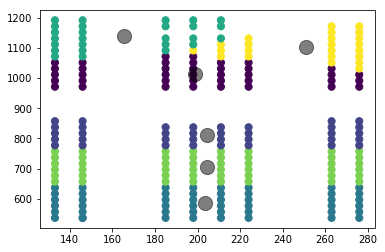

In [42]:
import matplotlib.pyplot as plt

y_kmeans = kmeans.predict(l_test)
plt.scatter(x, y, c=y_kmeans, s=50)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

#### KNN

In [43]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

knn = NearestNeighbors(n_neighbors=6, algorithm='ball_tree').fit(liste)
distances, indices = knn.kneighbors(liste)

In [44]:
knn

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=6, p=2, radius=1.0)

In [45]:
y_knn = knn.predict(liste)
plt.scatter(liste[:, 0], liste[:, 1], c=y_knn, s=50)

centers = knn.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [46]:
random_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'minkowski'],
               'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

### CAH

In [47]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch

In [48]:
# generate link matrix
Z = linkage(l_test, method='ward', metric='euclidean')

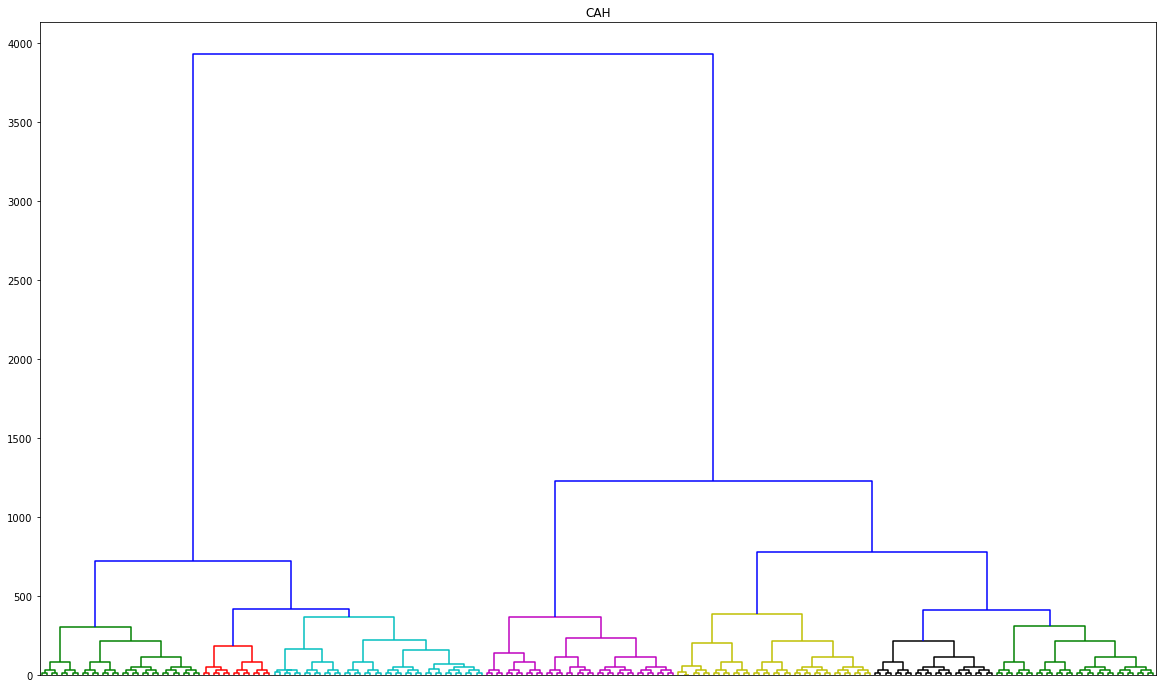

7 groupes constitués
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3]


In [49]:
# génération et affichage du dendrogramme
plt.figure(figsize=(20, 12))
plt.title("CAH")
dendrogram(Z, labels=l_test, no_labels=True, color_threshold=400)
plt.show()
groupes_cah = sch.fcluster(Z, t=400, criterion='distance')
print(np.unique(groupes_cah).size, "groupes constitués")
groupe = list(groupes_cah)
print(groupe)

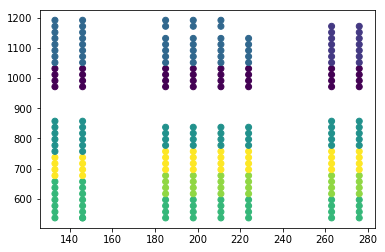

In [50]:
plt.scatter(x, y, c=groupes_cah)
plt.show()

In [51]:
groupes_cah = sch.fcluster(Z, t=400, criterion='distance')
groupes_cah

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6,
       6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 4, 7,
       7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3], dtype=int32)

#### DBScan

In [165]:
import sklearn
from sklearn.cluster import DBSCAN

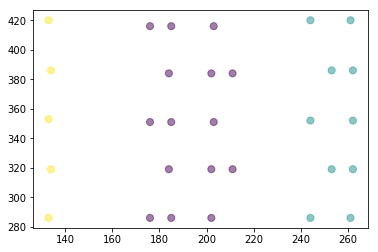

In [168]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(liste)
plt.scatter(x, y, c=dbscan.labels_.astype(float), s=50, alpha=0.5)


plt.show()
# cv2.imwrite('res.png',img_rgb)

## Post-Processing OK

In [5]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import csv
import cv2
from matplotlib import pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
import math
from sklearn.cluster import KMeans
import sklearn
from sklearn.cluster import DBSCAN
from matplotlib import patches

In [6]:
path = "C:/Users/ng85ffc/Desktop/"
path1 = "Data/"
path2 = "ProjetInterpromo2020g8/images/"
path3 = "LAYOUT SEATGURU"

### Data extraction and formatting

In [61]:
plan = open(path + path1 +
            "coord_Aer_Lingus_Airbus_A321_plane10.jpg.txt", "r")
data = plan.read()

In [62]:
x = []
y = []
data = data.replace('\n', ',').replace(' ', '').split(',')
data.remove('')

In [63]:
line_head = []
for line in range(len(data)):
    if data[line][len(data[line])-3:len(data[line])] == "jpg" or data[line][len(data[line])-3:len(data[line])] == "png":
        line_head.append(line)

In [64]:
line_head

[0, 1, 2, 3, 4, 413, 1086, 1087, 1610]

In [65]:
for i in reversed(line_head):
    del data[i]

In [66]:
data = [int(i) for i in data]

for i in range(0, len(data)-1, 2):
    x.append(int(data[i]))
    y.append(int(data[i+1]))

list_test = list(zip(x,y))
array_test = np.array(list(zip(x,y)))

In [67]:
list_test

[(153, 354),
 (153, 355),
 (226, 355),
 (247, 355),
 (267, 355),
 (133, 386),
 (153, 386),
 (173, 386),
 (174, 386),
 (226, 386),
 (247, 386),
 (267, 386),
 (133, 417),
 (153, 417),
 (173, 417),
 (174, 417),
 (267, 417),
 (226, 418),
 (247, 418),
 (267, 418),
 (133, 449),
 (154, 449),
 (174, 449),
 (227, 450),
 (247, 450),
 (268, 450),
 (133, 480),
 (174, 480),
 (133, 481),
 (174, 481),
 (227, 481),
 (247, 481),
 (268, 481),
 (133, 512),
 (153, 512),
 (154, 512),
 (174, 512),
 (227, 512),
 (247, 512),
 (268, 512),
 (133, 544),
 (153, 544),
 (174, 544),
 (226, 544),
 (247, 544),
 (267, 544),
 (226, 575),
 (247, 575),
 (153, 576),
 (153, 648),
 (153, 649),
 (226, 649),
 (247, 649),
 (267, 649),
 (133, 680),
 (153, 680),
 (173, 680),
 (174, 680),
 (226, 680),
 (247, 680),
 (267, 680),
 (133, 711),
 (153, 711),
 (173, 711),
 (174, 711),
 (267, 711),
 (226, 712),
 (247, 712),
 (267, 712),
 (133, 743),
 (154, 743),
 (174, 743),
 (227, 744),
 (247, 744),
 (268, 744),
 (133, 774),
 (174, 774),

### Remove duplicate

In [68]:
def remove_duplicate(coordinate: list):
    """Documentation
    Parameters:
        coordinate: original coordinates without treatment
    Out:
        dup: list of coordinate which are duplicated
    """
    dup = []
    for point1 in coordinate:
        for point2 in coordinate:
            if point2 != point1 and point1 not in dup:
                if ((abs(point1[0] - point2[0]) <= 5) and (abs(point1[1] - point2[1]) <= 5)):
                    dup.append(point2)
    for d in dup:
        if d in coordinate: coordinate.remove(d)
    return(coordinate)

In [72]:
#list_wo_dup = remove_duplicate(find_duplicate(list_test), list_test)
list_wo_dup = remove_duplicate(list_test)

In [73]:
x_wo_dup = [a for a,b in list_wo_dup]
y_wo_dup = [b for a,b in list_wo_dup]
array_wo_dup = np.array(list(zip(x_wo_dup,y_wo_dup)))

### Find cluster with DBScan

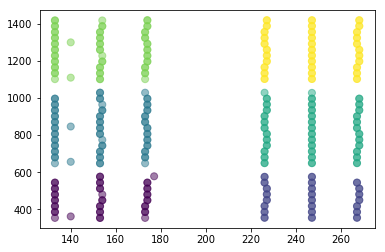

In [74]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(list_wo_dup)
plt.scatter(x_wo_dup, y_wo_dup, c=dbscan.labels_.astype(float), s=50, alpha=0.5)
plt.show()

### Draw cluster on template

In [75]:
def clusters_to_rect(dbscan: sklearn.cluster.dbscan_.DBSCAN, array_wo_dup: np.array):
    """Documentation
    Parameters:
        dbscan: result of the clustering with DBSCAN
    Out:
        list_rect: list of rectangles representing each cluster
    """
    list_coord = array_wo_dup
    label_groups = pd.Series(dbscan.labels_).unique()
    list_rect = []  # to plot with plt.patches
    list_rect2 = []  # all corners of the rectangles
    HEIGHT: int = 30
    WIDTH: int = 20
    for group in label_groups:
        index = [i for i, x in enumerate(list(dbscan.labels_)) if x == group]
        points_cluster = list_coord[index]
        corner_bottom_right = (max(i[0] for i in points_cluster) + WIDTH, min(
            i[1] for i in points_cluster) - HEIGHT)
        corner_top_right = (max(i[0] for i in points_cluster) + WIDTH, max(
            i[1] for i in points_cluster))
        corner_top_left = (min(i[0] for i in points_cluster), max(
            i[1] for i in points_cluster))
        corner_bottom_left = (min(i[0] for i in points_cluster), min(
            i[1] for i in points_cluster) - HEIGHT)
        height = corner_top_right[1] - corner_bottom_right[1]
        width = corner_bottom_right[0] - corner_bottom_left[0]
        list_rect.append(((corner_bottom_left), width, height))
        list_rect2.append(
            (corner_bottom_left, corner_top_left, corner_top_right, corner_bottom_right))
    return list_rect, list_rect2

In [76]:
r, r2 = clusters_to_rect(dbscan, array_wo_dup)

In [77]:
obstacle = [[(207, 133), (252, 191)],
 [(207, 217), (253, 290)],
 [(261, 122), (277, 130)],
 [(261, 130), (276, 137)],
 [(262, 285), (277, 293)],
 [(262, 293), (277, 301)],
 [(286, 130), (315, 195)],
 [(286, 227), (315, 292)],
 [(601, 122), (612, 128)],
 [(601, 288), (613, 294)],
 [(601, 293), (613, 300)],
 [(1053, 122), (1064, 128)],
 [(1053, 293), (1065, 300)],
 [(1477, 130), (1512, 195)],
 [(1477, 227), (1512, 292)],
 [(1524, 119), (1539, 127)],
 [(1525, 296), (1539, 304)],
 [(1552, 130), (1629, 292)]]

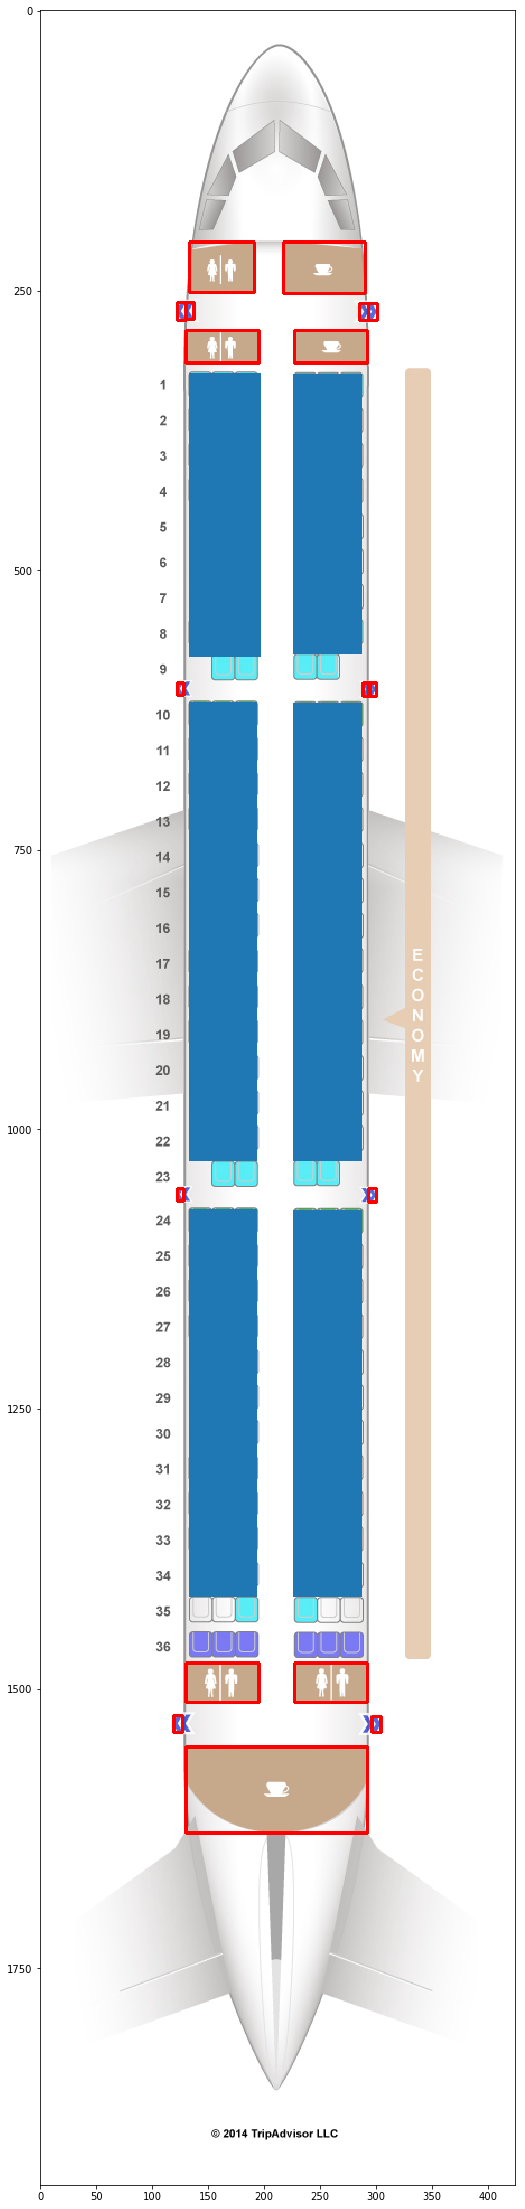

In [78]:
fig1 = plt.figure(figsize=(20, 40))
ax1 = fig1.add_subplot(111, aspect='equal')
for rect in r:
    ax1.add_patch(
        patches.Rectangle(rect[0], rect[1], rect[2]))

# x_coord = [i[0][0] for i in r]
# y_coord = [i[0][1] for i in r]
# plt.xlim(min(x_coord)-10,max(x_coord)+r[x_coord.index(max(x_coord))][1]+10)
# plt.ylim(min(y_coord)-10,max(y_coord)+r[y_coord.index(max(y_coord))][2]+10)
# plt.xlim(0,500)


img_rgb = plt.imread(path + path1 + path3 +
                     "/Aer_Lingus_Airbus_A321_plane10.jpg")
# plt.imshow(img_rgb)

img_cv = cv2.imread(path + path1 + path3 +
                    "/Aer_Lingus_Airbus_A321_plane10.jpg")
for obs in obstacle:
    A_point = obs[0][1], obs[0][0]
    B_point = obs[1][1], obs[1][0]

    img_cv = cv2.rectangle(img_cv, A_point, B_point, (255, 0, 0), 2)

# plt.figure(figsize=(20,40))
plt.imshow(img_cv)
plt.show()

### Shortest route calculation

In [79]:
def centroid_obstacle(coord_obs:tuple):
    """Documentation
    Parameters:
        coord_obs: cooardinate of the obstacle
    Out:
        coord_bar_obs: barycenter cooardinate of the obstacle
    """
    A_point = coord_obs[0][1], coord_obs[0][0]
    B_point = coord_obs[1][1], coord_obs[1][0]
    coord_bar_obs = int(np.mean([A_point[0], B_point[0]])), int(np.mean([A_point[1], B_point[1]]))
    return coord_bar_obs

In [80]:
def centroid_seat(coord_seat:tuple):
    """Documentation
    Parameters:
        coord_seat: cooardinate of the seat
    Out:
        coord_bar_seat: barycenter cooardinate of the seat
    """
    x, y = coord_seat[0], coord_seat[1]
    h, w  = 30, 20
    coord_bar_seat = int(np.mean([x, x+w])), int(np.mean([y, y+h]))
    return coord_bar_seat

In [81]:
def dist_crow_flies(coord_bar_seat: tuple, coord_bar_obs: tuple):
    """Documentation
    Parameters:
        coord_bar_seat: barycenter coordinate of the seat
        coord_bar_obs: barycenter cooardinate of the obstacle
    Out:
        dist: distance between the two barycenter
    """
    dist = np.sqrt(((coord_bar_obs[0]-coord_bar_seat[0])**2)+((coord_bar_obs[1]-coord_bar_seat[1])**2))
    return dist

In [82]:
for obs in range(len(obstacle)):
    print("obstacle" + str(obs))
    for seat in range(len(list_wo_dup)):
        print(dist_crow_flies(centroid_seat(list_wo_dup[seat]),centroid_obstacle(obstacle[obs])))
        

obstacle0
140.003571383
159.238814364
170.017646143
181.950542731
173.046236596
172.002906952
173.277234512
187.243157418
196.491730106
206.903359083
203.887223729
203.002463039
204.08331632
233.310951307
217.006912332
225.035552747
235.766833969
235.008510484
236.027540766
247.630773532
254.40322325
262.967678622
266.677708105
266.908223927
277.333733974
283.397247693
291.109944866
298.605090379
298.001677848
298.810977041
307.293019771
312.776277873
319.781175181
330.54651715
330.001515148
330.732520324
338.195209901
343.402096674
349.4638751
368.506444991
373.290771383
362.001381213
434.001152072
441.249362606
445.252737218
449.944441015
466.387178211
466.00107296
466.472935978
471.838955577
475.58490304
479.980207925
497.363046476
497.001006035
497.443464124
510.131355633
503.467973162
506.98027575
529.341099859
529.003780705
529.457269286
535.280300403
538.446840459
542.545850597
560.322228722
560.431976247
565.991166009
568.986818828
572.867349393
592.304820173
592.000844594
592.

In [99]:
def path_three_segment(coord_bar_seat: tuple, coord_bar_obs: tuple, r:list):   
    
    """Documentation
    Parameters:
        coord_bar_seat: barycenter coordinate of the seat
        coord_bar_obs: barycenter cooardinate of the obstacle
        r: list of rectangles representing each cluster
    Out:
        dist: distance between the two barycenter in three segments
        coord: coordinate of the three segmants
    """
    
    x_hall = []
    dist1 = 0
    dist2 = 0
    dist3 = 0
    dist = 0
    coord_seat_hall = 0
    coord_hall_obs = 0

    for rect in range(0, len(r), 2):
#         if r[rect][0][1] == r[rect+1][0][1]:
        x_hall.append((r[rect][0][0] + r[rect][1] + r[rect+1][0][0])/2)
        x_hall.append((rect, rect+1))
    print(x_hall)
    for i in range(1, len(x_hall), 2):
        if x_hall[i][0] == dbscan.labels_[0] or x_hall[i][1] == dbscan.labels_[0]:
                dist1 = abs(coord_bar_seat[0]-x_hall[i-1])
                coord_seat_hall =(int(x_hall[i-1]),coord_bar_seat[1])
                dist2 = abs(coord_bar_obs[1]-coord_bar_seat[1])
                coord_hall_obs = (int(x_hall[i-1]),coord_bar_obs[1])
                dist3 = abs(coord_bar_obs[0]-x_hall[i-1])

    dist = np.sum([dist1,dist2,dist3])
    coord = [coord_bar_seat, coord_seat_hall, coord_hall_obs, coord_bar_obs]

    return(dist, coord)

In [98]:
r

[((133, 324), 64, 254),
 ((226, 325), 62, 250),
 ((133, 618), 61, 410),
 ((226, 619), 62, 409),
 ((133, 1071), 61, 347),
 ((226, 1072), 62, 346)]

In [100]:
shortest_path = path_three_segment(centroid_seat(list_wo_dup[0]),centroid_obstacle(obstacle[0]), r)

[211.5, (0, 1), 210.0, (2, 3), 210.0, (4, 5)]


In [101]:
shortest_path

(238.0, [(163, 369), (211, 369), (211, 229), (162, 229)])

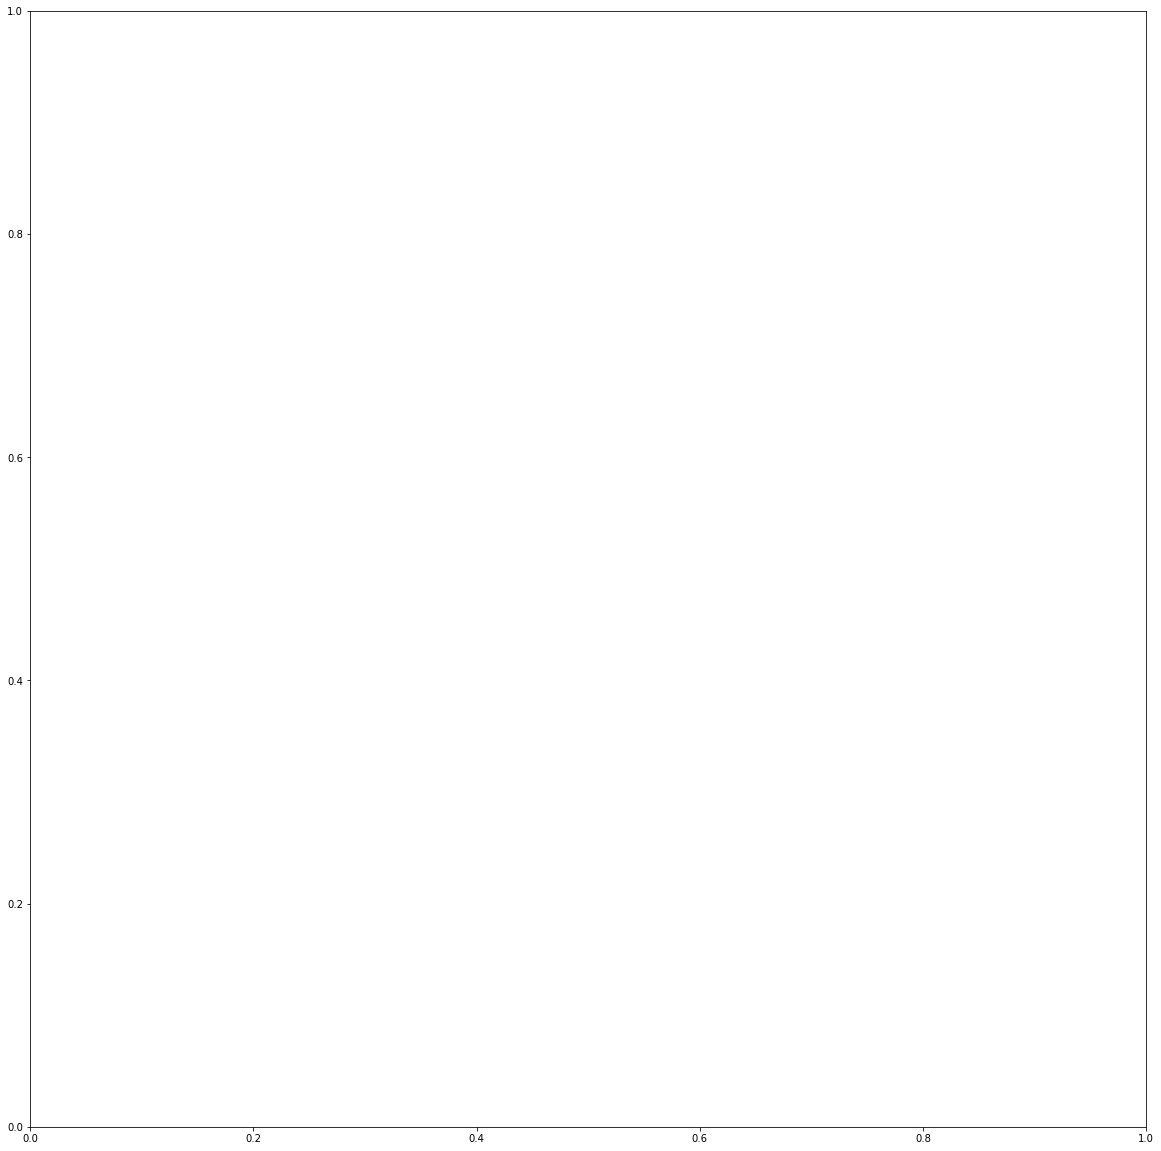

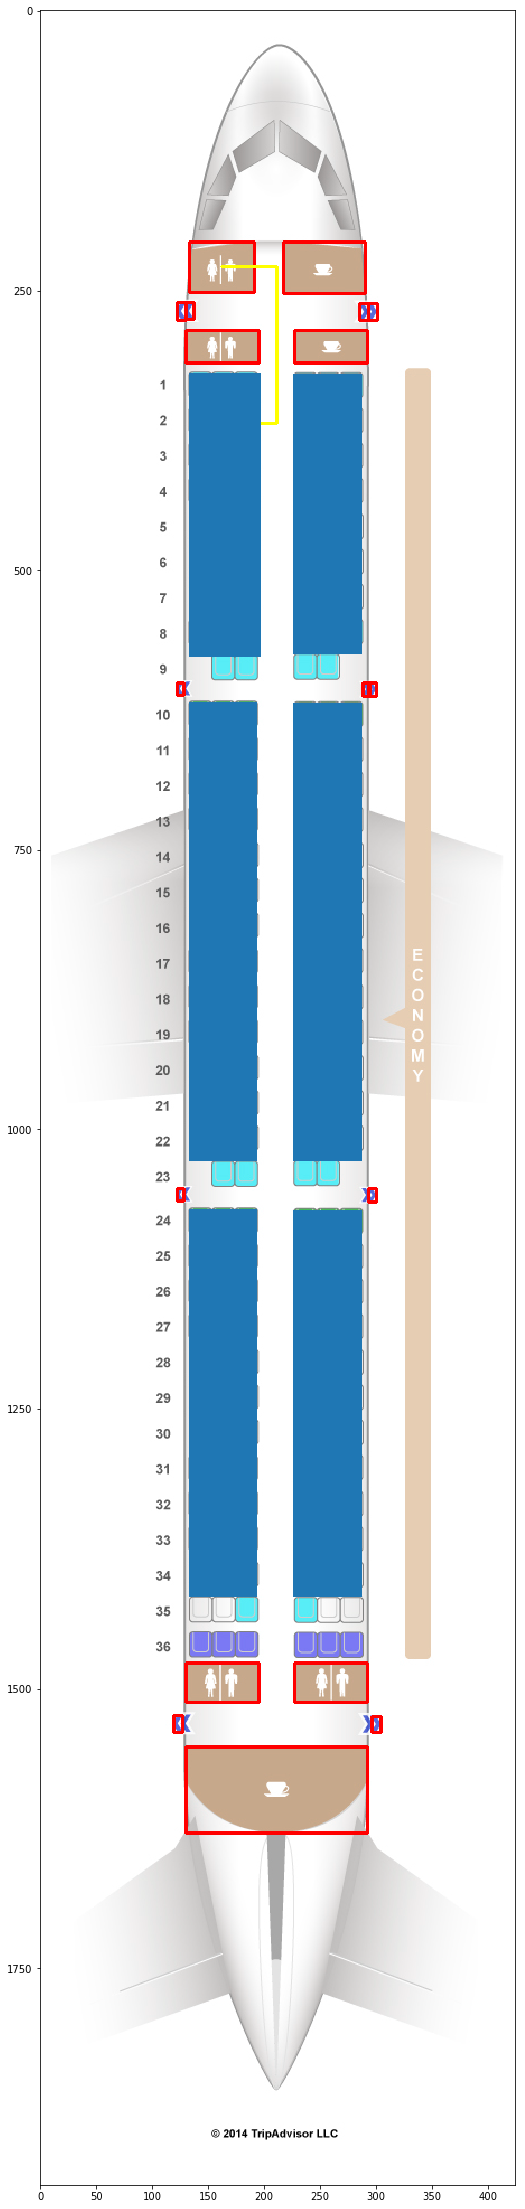

In [104]:
fig1 = plt.figure(figsize=(20, 40))
ax1 = fig1.add_subplot(111, aspect='equal')
for rect in r:
    ax1.add_patch(
        patches.Rectangle(rect[0], rect[1], rect[2]))

# x_coord = [i[0][0] for i in r]
# y_coord = [i[0][1] for i in r]
# plt.xlim(min(x_coord)-10,max(x_coord)+r[x_coord.index(max(x_coord))][1]+10)
# plt.ylim(min(y_coord)-10,max(y_coord)+r[y_coord.index(max(y_coord))][2]+10)
# plt.xlim(0,500)



img_rgb = plt.imread(path + path1 + path3 +
                     "/Aer_Lingus_Airbus_A321_plane10.jpg")
# plt.imshow(img_rgb)

img_cv = cv2.imread(path + path1 + path3 +
                     "/Aer_Lingus_Airbus_A321_plane10.jpg")
for obs in obstacle:
    A_point = obs[0][1], obs[0][0]
    B_point = obs[1][1], obs[1][0]
    
    img_cv = cv2.rectangle(img_cv, A_point, B_point, (255, 0, 0), 2)

# for 
img_cv = cv2.line(img_cv, shortest_path[1][0], shortest_path[1][1], (255, 255, 0), 2) 
img_cv = cv2.line(img_cv, shortest_path[1][1], shortest_path[1][2], (255, 255, 0), 2)
img_cv = cv2.line(img_cv, shortest_path[1][2], shortest_path[1][3], (255, 255, 0), 2)
# plt.figure(figsize=(20,40))
plt.imshow(img_cv)


#     img_cv = cv2.rectangle(img_cv, A_point, B_point, (255, 0, 0), 2)
# plt.plot(shortest_path[1][0][0],shortest_path[1][0][1])
# plt.plot([shortest_path[1][0][0],shortest_path[1][0][1]], [shortest_path[1][1][0], shortest_path[1][1][1]])
# plt.plot([shortest_path[1][1][0],shortest_path[1][1][1]],[shortest_path[1][2][0],shortest_path[1][2][1]])
# plt.plot([shortest_path[1][2][0],shortest_path[1][2][1]], [shortest_path[1][3][0],shortest_path[1][3][1]])

plt.show()

In [41]:
shortest_path[1][0]

(144, 356)

In [1]:
type([(207, 133), (252, 191)])

list